In [155]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical


import pickle
import tensorflow as tf


In [156]:
!pwd
tf
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices())
#???

/media/jp/3aa509e1-f76e-48e5-bcb0-bc671881dca6/home/jp/orange-classifier-2
Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [157]:
##Estudando os dados....
#OpenCV-Python is a library of Python bindings designed to solve computer vision problems. 
#cv2.cvtColor() method is used to convert an image from one color space to another. There are more than 150
#color-space conversion methods available in OpenCV. We will use some of color space conversion codes below.
def load_rand():
    X=[]
    dir_path='./archive/dataset/dataset/train' #Diretorio dos dados de treinamento
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir) #rottenoranges vs freshoranges
        print(path_main)
        i=0
        for img_name in os.listdir(path_main): #Loop in each directory ['fresh', 'rotten']
            print(img_name)
            if i>=12: #Read 18 images each directory (36 in total)
                break
            img=cv2.imread(os.path.join(path_main,img_name)) #read image
            img=cv2.resize(img,(100,100)) #resize image 100x100 pixels
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert image
            X.append(img)
            i+=1
    return X

In [160]:
X=load_rand()

 67%|██████▋   | 2/3 [00:00<00:00, 19.41it/s]

Soybean_healthy
./archive/dataset/dataset/train/Soybean_healthy
NASA_Soy.PNG
leaf soybean healthy_37.jpg
leaf soybean healthy_90.jpg
leaf soybean healthy_4.jpg
leaf soybean healthy_8.jpg
aug_74.jpg
leaf soybean healthy_106.jpg
plant_village_14975109218_bc9a134b7c_z.jpg
Zambia_Agriculure_Research_Institute_2.PNG
flckr_alabama_farmer_association_soy1.PNG
aug_79.jpg
leaf soybean healthy_9.jpg
plant_village_9623506080_0c39d248f6_z.jpg
Soybean_rust
./archive/dataset/dataset/train/Soybean_rust
Soybean Rust Disease_25.jpg
aug_57.jpg
soybean_rust_invasive_5202016.jpg
aug_68.jpg
aug_74.jpg
aug_94.jpg
aug_3.jpg
aug_96.jpg
aug_79.jpg
Soybean Rust Disease_21.jpg
aug_38.jpg
aug_60.jpg
Soybean Rust Disease_32.jpg
Soybean_downy
./archive/dataset/dataset/train/Soybean_downy
aug_57.jpg
aug_68.jpg
aug_74.jpg
aug_94.jpg
Soybean downie midlew_119.jpg
aug_96.jpg
Soybean downie midlew_81.jpg
Soybean downie midlew_17.jpg
aug_79.jpg
Soybean downie midlew_103.jpg
Soybean downie midlew_80.jpg


100%|██████████| 3/3 [00:00<00:00, 13.79it/s]

aug_60.jpg
Soybean downie midlew_41.jpg


In [161]:
X=np.array(X)
X.shape #36 linhas de imagens de 100x100 pixels com profundidade 3 (RGB)
#onde R é Vermelho, G é Verde e B é Azul

(36, 100, 100, 3)

In [162]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        
        list_fruits=['downy', 'healthy', 'rust']
        
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//18])
        plt.show()
    else:
        print('Cannot plot')

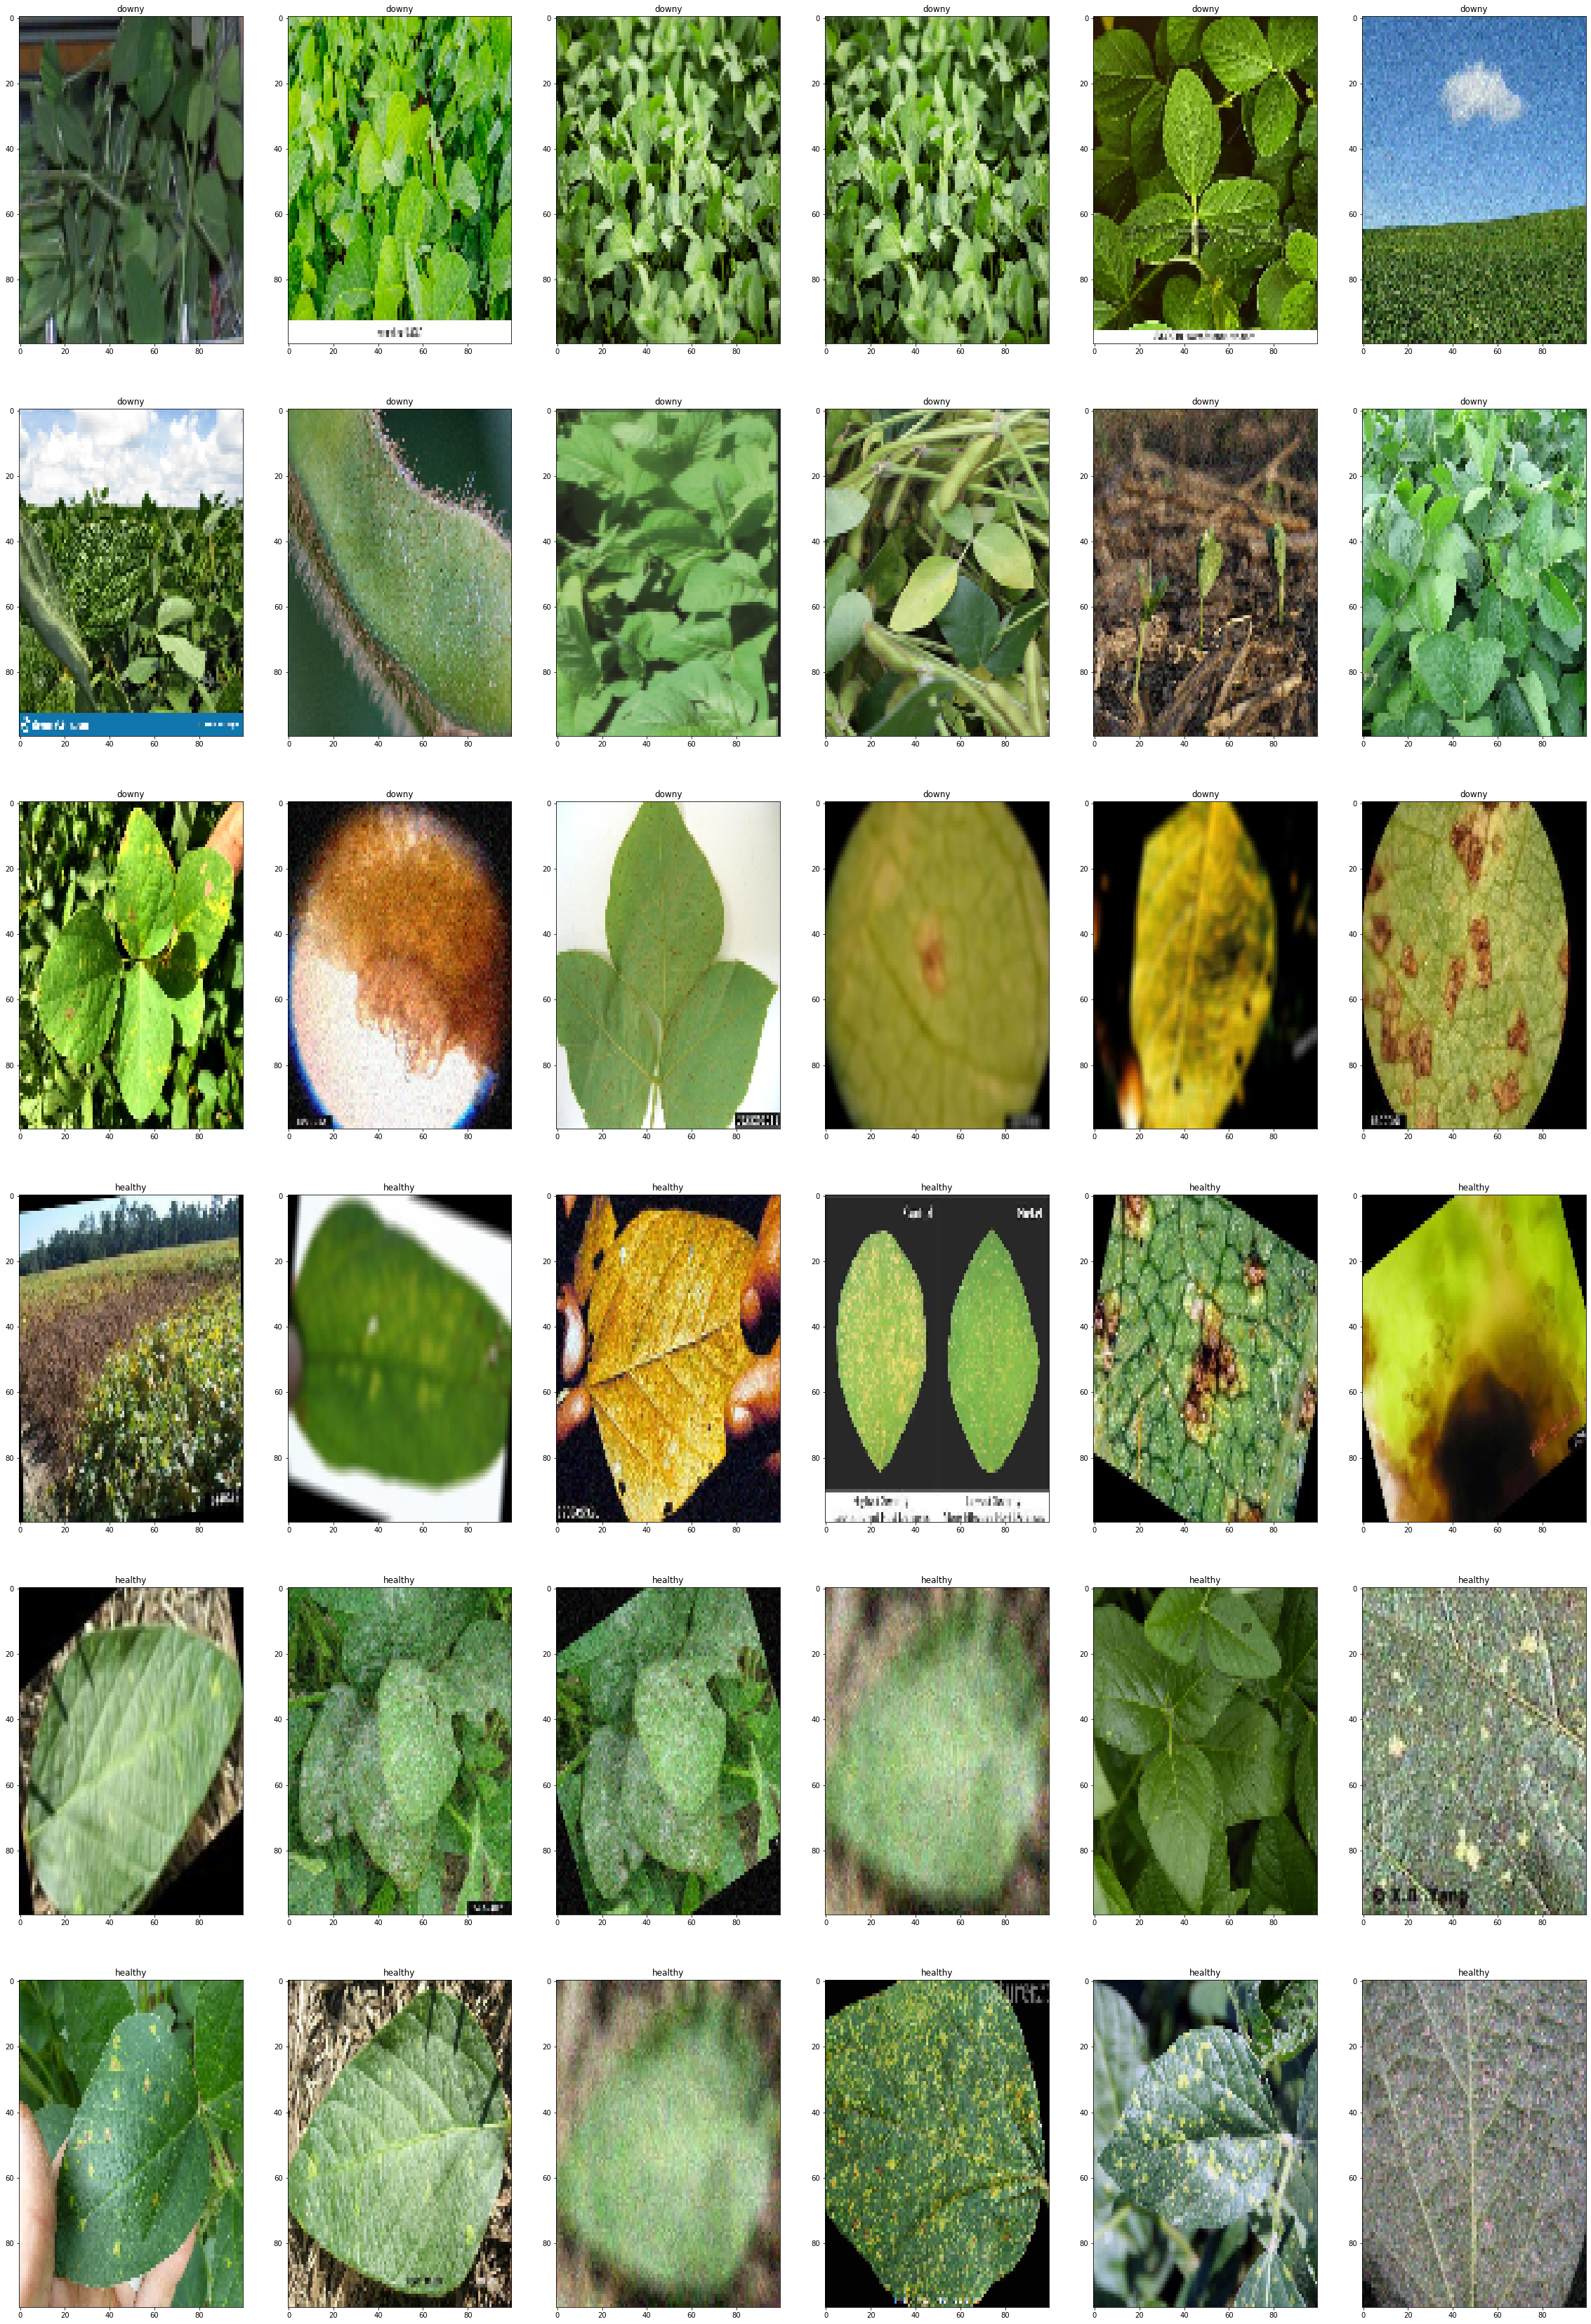

In [163]:
show_subpot(X)
#img = plt.imshow (X [1], aspect='auto')


In [164]:
del X

In [165]:
#Carrega as imagens e coloca labels para elas
def load_rottenvsfresh():
    quality=['downy', 'healthy', 'rust']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('./archive/dataset/dataset/train')):
        if quality[0] in cata:
            path_main=os.path.join('./archive/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0]) #fresh
        elif quality[1] in cata:
            path_main=os.path.join('./archive/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1]) #rotten
        else:
            path_main=os.path.join('./archive/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2]) #less
    print('Shuffling your data.....')
    
    shuffle(z)
    for images, labels in tqdm(z):
        print(labels)
        X.append(images);Y.append(labels)
    return X,Y

In [166]:
X,Y=load_rottenvsfresh()


100%|██████████| 483/483 [00:00<00:00, 19444.17it/s]

Shuffling your data.....
0
2
2
1
1
0
2
2
2
0
1
1
2
2
1
1
2
0
2
0
0
1
1
1
2
0
2
0
1
2
2
1
0
2
2
2
1
2
2
2
0
1
2
0
0
2
1
0
2
2
0
0
2
0
2
2
1
0
2
1
1
2
2
0
0
2
0
2
1
1
2
2
0
2
2
2
0
1
1
1
0
2
1
2
2
0
2
2
1
2
0
1
0
0
0
2
1
2
1
0
0
2
2
2
0
1
0
0
0
2
0
0
2
2
0
1
2
2
0
0
2
1
1
0
2
2
0
0
2
1
2
2
0
1
0
1
2
0
2
2
0
2
2
2
0
2
1
2
0
2
0
1
2
0
2
0
2
2
0
1
0
1
1
2
1
2
1
0
2
1
0
2
0
2
1
1
2
2
0
0
0
2
0
2
2
2
1
2
2
1
2
0
0
0
1
0
0
1
1
2
0
0
0
2
1
2
1
0
1
0
2
2
0
0
2
2
2
2
1
2
1
0
0
1
2
2
1
1
2
0
2
2
0
0
2
1
0
0
2
0
2
2
2
2
1
1
2
0
0
1
1
0
1
2
1
2
2
0
1
2
2
2
2
2
2
0
0
0
2
0
2
1
0
0
0
1
0
0
2
2
2
0
2
0
1
0
1
2
2
2
2
2
2
1
1
0
1
2
0
2
1
2
0
2
0
1
2
2
0
2
0
0
1
2
2
1
0
1
2
0
2
2
1
1
2
0
2
0
2
0
0
2
2
0
0
1
0
2
2
1
2
2
2
2
1
2
0
1
0
1
1
0
0
2
2
2
0
2
1
1
2
0
2
1
2
2
1
2
2
0
0
0
0
2
1
2
0
2
2
0
2
1
2
2
2
0
2
0
1
2
2
1
1
0
2
2
2
2
2
2
2
1
2
1
0
2
2
2
0
0
0
2
2
2
2
1
1
1
1
0
2
1
1
2
0
2
0
0
2
1
1
1
2
2
1
2
0
1
2
1
1
2
1
2
2
2
2
0
2
2
1
1
0
2
2
1
1
2
2
0
0
1
2
0
0
2
2
2
2
2
0
0
0
1
0
0
2
1
2
1
2
2
0


In [167]:
Y=np.array(Y)
X=np.array(X)

In [168]:
y_ser=pd.Series(Y)
y_ser.value_counts()

2    217
0    148
1    118
dtype: int64

In [201]:
def load_rottenvsfresh_valset():
    quality=['downy', 'healthy', 'rust']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('./archive/dataset/dataset/test/')):
        if quality[0] in cata:
            path_main=os.path.join('./archive/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                print(os.path.join(path_main,img_name))
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0]) #fresh
        elif quality[1] in cata:
            path_main=os.path.join('./archive/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1]) #rotten
        else:
            path_main=os.path.join('./archive/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2]) #less

    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)        
    return X,Y      

In [202]:
X_val,Y_val=load_rottenvsfresh_valset()


100%|██████████| 43/43 [00:00<00:00, 351569.34it/s]

Shuffling your data.....


In [204]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)

y_ser=pd.Series(Y_val)
y_ser.value_counts()



1    43
dtype: int64

In [173]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [174]:
#Para construir o modelo, precisamos criar a arquitetura usando Sequential().
model = Sequential()

#Em seguida, adicionamos a primeira camada, uma camada de convolução para extrair 
#recursos da imagem de entrada e criamos 32 recursos convolutos 3 x 3 ReLu, 
#também conhecidos como mapas de recursos. Como esta é a primeira camada, devemos inserir a forma 
#da dimensão que é uma imagem de 100 x 100 pixels com profundidade = 3 (RGB).
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', 
                 activation='relu', input_shape=(100,100,3)))

model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))

#A próxima camada será uma camada de pooling com um filtro de 2 x 2 pixels para obter o 
#elemento máximo dos mapas de feições. Isso reduz a dimensão dos mapas de recursos pela metade e 
#também é conhecido como subamostragem.
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

#Crie mais uma camada de convolução e camada de agrupamento como antes, mas sem o input_shape.
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
#Adicione uma camada de achatamento para reduzir a imagem a uma matriz linear, 
#também conhecida como um vetor de dimensão única, para alimentar e conectar-se à rede neural.
model.add(Flatten())
#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
#Agora crie uma rede neural onde a primeira camada tem 128 neurônios e a função de ativação ReLu .
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#Adicione uma camada de drop out com 30% de drop out.
model.add(Dropout(0.3))
#Crie a última camada desta rede neural usando a função softmax .
model.add(Dense(3, activation='softmax'))

In [175]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d_18 (Separab (None, 100, 100, 32)      1344      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
separable_conv2d_19 (Separab (None, 50, 50, 64)       

In [176]:
import tensorflow as tf


In [177]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=2, mode='max',
    min_lr=0.00002, cooldown=2)

check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='./rottenvs fresh.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

#compile o modelo, binary_crossentropy pois sao apenas 2 classes, otimizador adam e a precisao do modelo como metrica
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [205]:
X=X/255.0
X_val=X_val/255.0


In [179]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 25,
                 callbacks=[check_point])

Epoch 1/25
25/25 [==============================] - 7s 273ms/step - loss: 5.0991 - accuracy: 0.4751 - val_loss: 5.1219 - val_accuracy: 0.3280

Epoch 00001: val_loss improved from inf to 5.12195, saving model to ./rottenvs fresh.h5
Epoch 2/25
25/25 [==============================] - 7s 265ms/step - loss: 1.1452 - accuracy: 0.6600 - val_loss: 10.5148 - val_accuracy: 0.1720

Epoch 00002: val_loss did not improve from 5.12195
Epoch 3/25
25/25 [==============================] - 7s 269ms/step - loss: 0.7104 - accuracy: 0.7178 - val_loss: 16.3152 - val_accuracy: 0.1720

Epoch 00003: val_loss did not improve from 5.12195
Epoch 4/25
25/25 [==============================] - 7s 277ms/step - loss: 0.5903 - accuracy: 0.7920 - val_loss: 18.9864 - val_accuracy: 0.1720

Epoch 00004: val_loss did not improve from 5.12195
Epoch 5/25
25/25 [==============================] - 7s 283ms/step - loss: 0.4122 - accuracy: 0.8239 - val_loss: 22.5574 - val_accuracy: 0.1720

Epoch 00005: val_loss did not improve fr

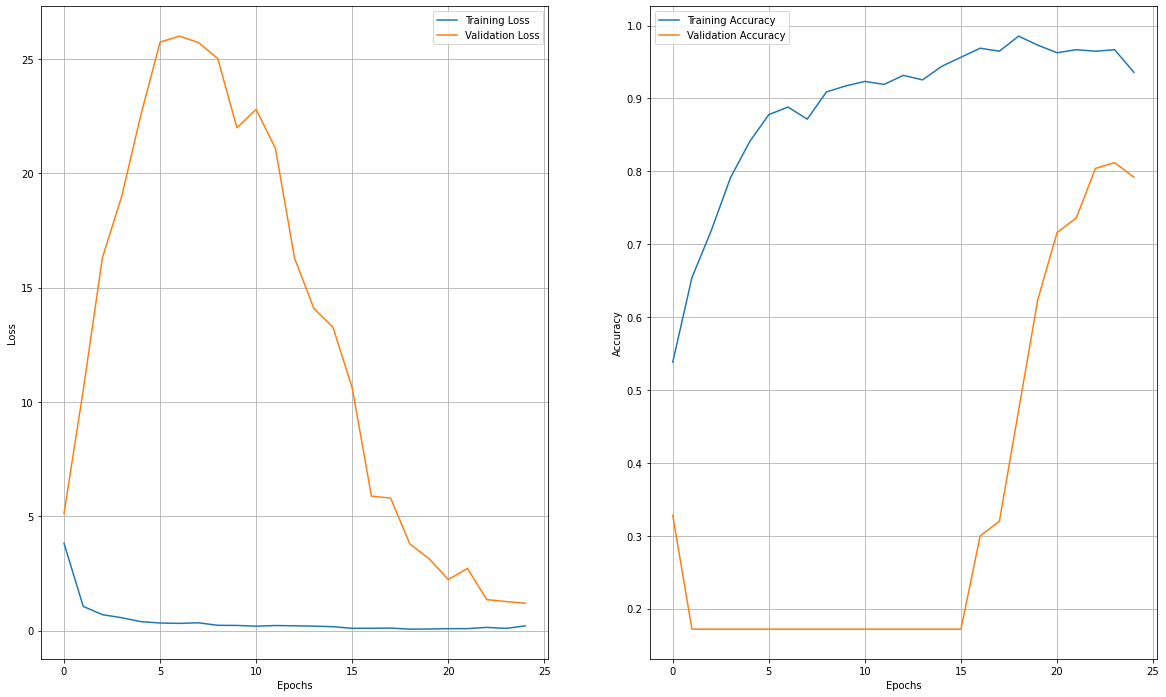

In [180]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [181]:
model.evaluate(X_val,Y_val)


8/8 [==============================] - 1s 80ms/step - loss: 1.1985 - accuracy: 0.7920


[1.1984922885894775, 0.7919999957084656]

In [182]:
model.save('./rottenvsfresh.h5')

In [183]:
from keras.models import Model, load_model


new_model=load_model('./rottenvsfresh.h5')


In [206]:
new_model.evaluate(X_val,Y_val)


2/2 [==============================] - 0s 38ms/step - loss: 0.9111 - accuracy: 0.7907


[0.9111196994781494, 0.7906976938247681]

In [207]:
#show_subpot(X_val[:4],title=True,Y=model.predict_classes(X_val[:4]))
model.predict_classes(X_val[:80])

array([0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

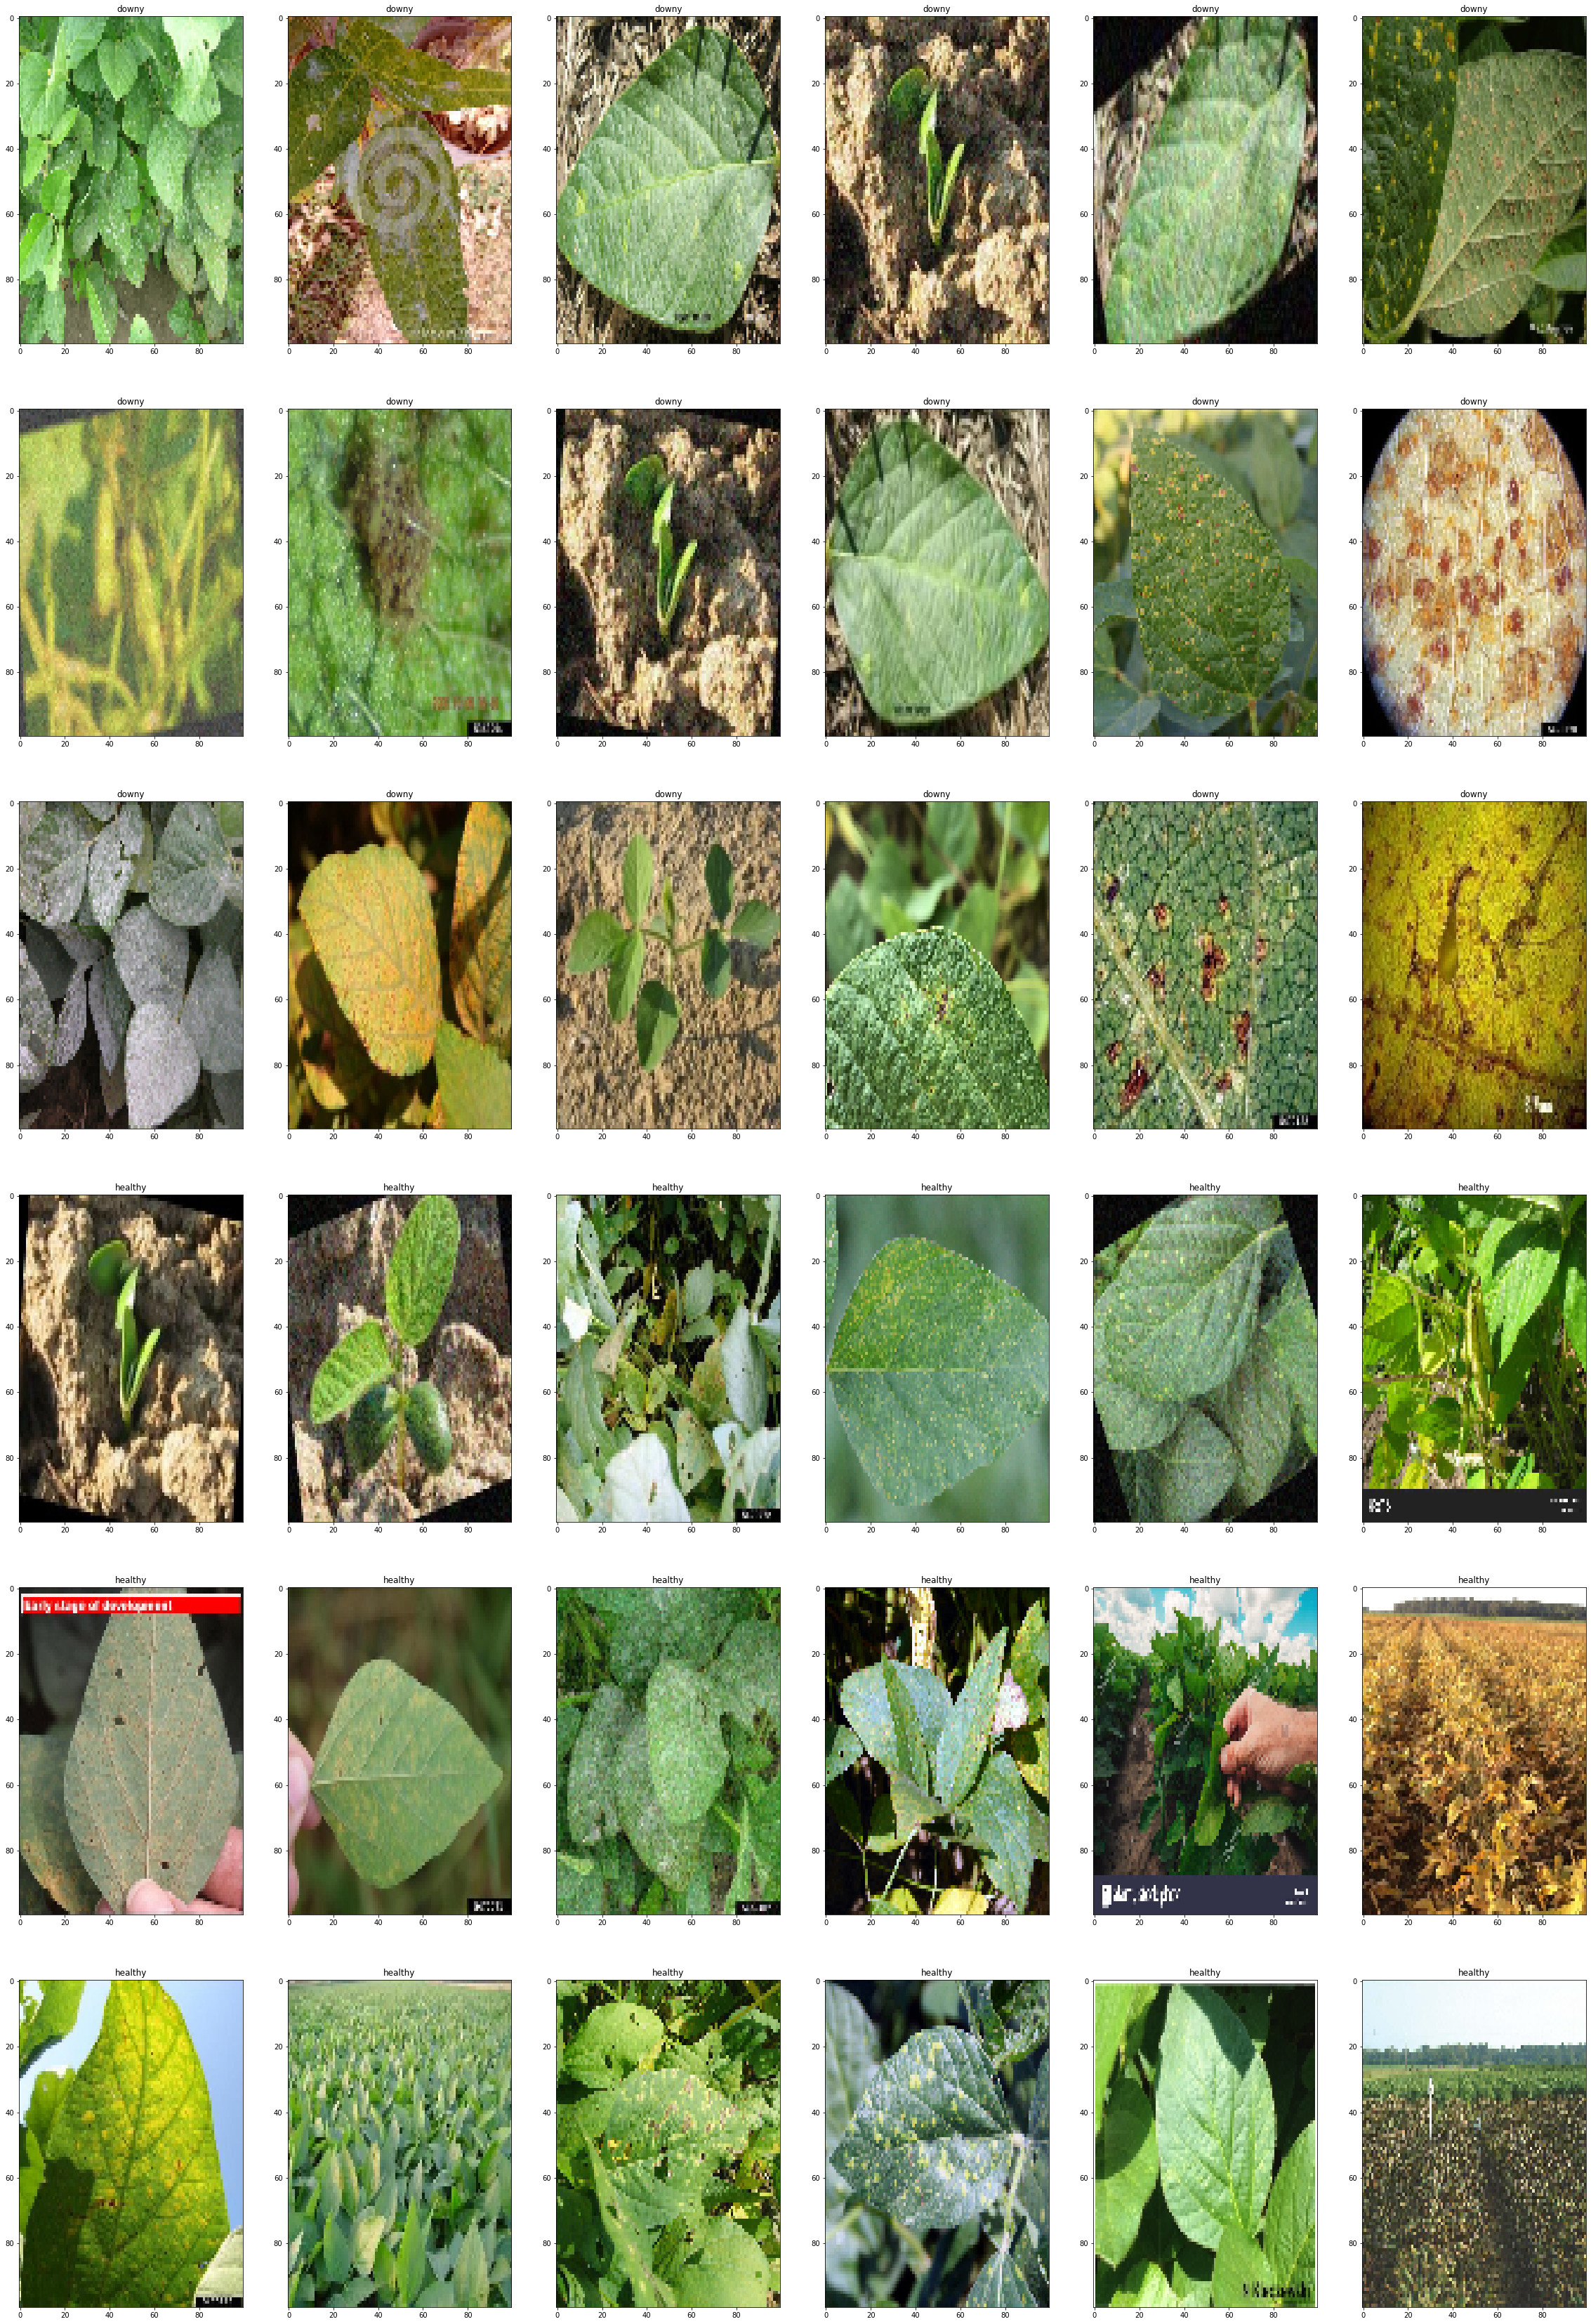

array([1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0,
       0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1])

In [187]:
show_subpot(X_val[:36], title=False)
new_model.predict_classes(X_val[:36])

